In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_excel(r"https://github.com/chris1610/pbpython/blob/master/data/2018_Sales_Total_v2.xlsx?raw=True")

In [3]:
#EDA process of the dataset

In [35]:
data.dtypes

account number             int64
name                      object
sku                       object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

In [4]:
data.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


In [5]:
data.tail()

,account number,name,sku,quantity,unit price,ext price,date
1502,424914,White-Trantow,B1-69924,37,42.77,1582.49,2018-11-27 14:29:02
1503,424914,White-Trantow,S1-47412,16,65.58,1049.28,2018-12-19 15:15:41
1504,424914,White-Trantow,B1-86481,75,28.89,2166.75,2018-12-29 13:03:54
1505,424914,White-Trantow,S1-82801,20,95.75,1915.00,2018-12-22 03:31:36
1506,424914,White-Trantow,S2-83881,100,88.19,8819.00,2018-12-16 00:46:26


In [6]:
data.shape

(1507, 7)

In [33]:
data.types()

AttributeError: 'DataFrame' object has no attribute 'types'

In [7]:
data.describe()

,account number,quantity,unit price,ext price
count,1507.000000,1507.000000,1507.000000,1507.000000
mean,486155.565362,24.439283,54.919827,1349.851194
std,222189.242438,14.811189,25.891960,1110.820807
min,141962.000000,-1.000000,10.030000,-97.160000
25%,257198.000000,12.000000,32.375000,472.295000
50%,424914.000000,25.000000,55.140000,1049.280000
75%,714466.000000,37.000000,77.060000,2050.290000
max,786968.000000,100.000000,99.850000,8819.000000


In [8]:
data.columns

Index(['account number', 'name', 'sku', 'quantity', 'unit price', 'ext price',
       'date'],
      dtype='object')

In [9]:
data.nunique()

account number      20
name                20
sku                 30
quantity            53
unit price        1379
ext price         1482
date              1499
dtype: int64

In [10]:
data['sku'].unique()

array(['B1-20000', 'S2-77896', 'B1-69924', 'S1-65481', 'S2-34077',
       'B1-65551', 'S1-30248', 'S1-50961', 'S2-82423', 'S2-00301',
       'S2-23246', 'S2-10342', 'B1-53102', 'S1-06532', 'B1-50809',
       'S1-82801', 'B1-04202', 'S2-83881', 'S2-78676', 'B1-53636',
       'B1-38851', 'B1-86481', 'S1-93683', 'B1-33087', 'S1-27722',
       'B1-05914', 'B1-33364', 'S2-16558', 'S1-47412', 'S2-11481'],
      dtype=object)

In [11]:
#refining the data

In [12]:
data.isnull().sum()

account number    0
name              0
sku               0
quantity          0
unit price        0
ext price         0
date              0
dtype: int64

In [13]:
company = data.drop(['ext price'], axis=1)

In [14]:
#quantity below 20 is not needed in the analysis
figurerange = company.loc[pd.to_numeric(company['quantity']) >= 20]


In [22]:
figurerange.tail()

,account number,name,sku,quantity,unit price,date
1501,424914,White-Trantow,S2-34077,35,41.43,2018-11-22 09:11:53
1502,424914,White-Trantow,B1-69924,37,42.77,2018-11-27 14:29:02
1504,424914,White-Trantow,B1-86481,75,28.89,2018-12-29 13:03:54
1505,424914,White-Trantow,S1-82801,20,95.75,2018-12-22 03:31:36
1506,424914,White-Trantow,S2-83881,100,88.19,2018-12-16 00:46:26


In [23]:
#showing relations amongs the coulmns

In [24]:
corelation = figurerange.corr()


<AxesSubplot:>

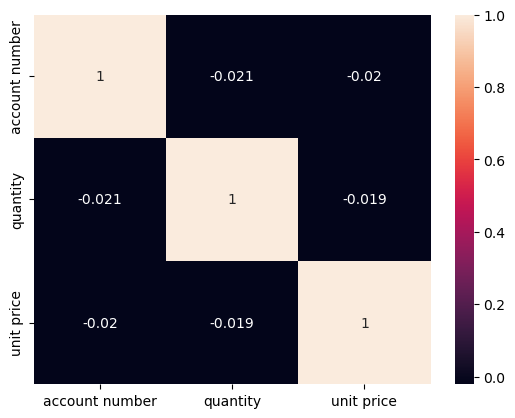

In [25]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,
            annot=True)

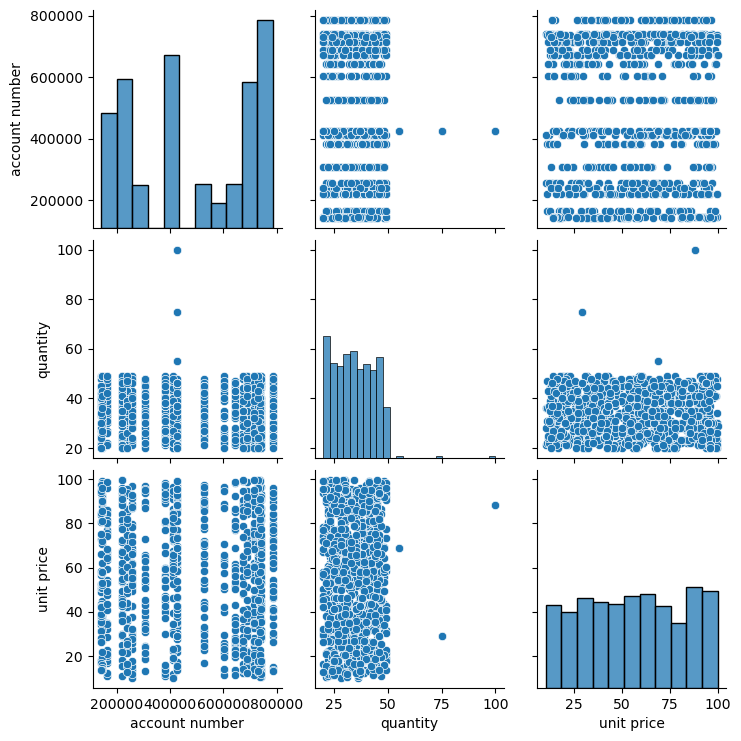

In [26]:
sns.pairplot(figurerange)

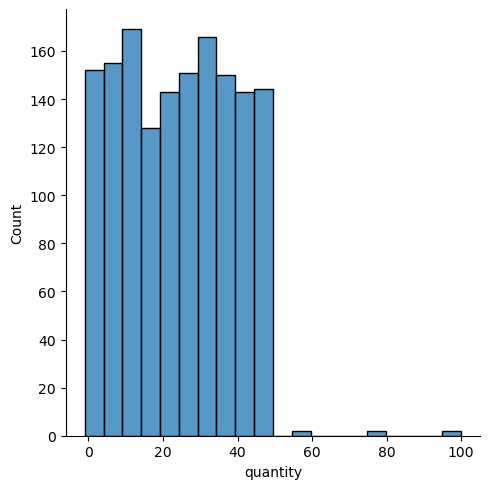

In [27]:
sns.displot(company['quantity'], bins=20)


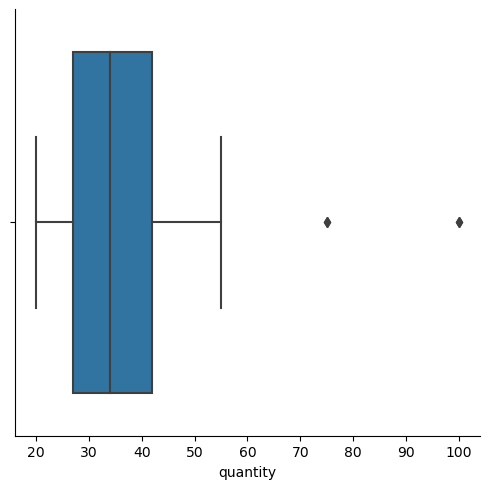

In [28]:
sns.catplot(x ="quantity", kind ="box", data = figurerange)